In [1]:
# Cell 1: Title & Introduction
# (Just a markdown-like print for a notebook header)
title = "Exploratory Data Analysis (EDA) of Netflix Movies and TV Shows"
objective = """
Objective:
- Analyze the Netflix catalog to uncover trends in content addition over time,
  study ratings distribution, and find the most common genres.
- Perform data cleaning, feature engineering, and build a baseline model to
  classify content type (Movie vs TV Show).
Dataset: netflix_titles.csv
"""
print("#" * 80)
print(title)
print("#" * 80)
print(objective)

################################################################################
Exploratory Data Analysis (EDA) of Netflix Movies and TV Shows
################################################################################

Objective:
- Analyze the Netflix catalog to uncover trends in content addition over time,
  study ratings distribution, and find the most common genres.
- Perform data cleaning, feature engineering, and build a baseline model to
  classify content type (Movie vs TV Show).
Dataset: netflix_titles.csv



In [2]:
from google.colab import files
uploaded = files.upload()   # upload netflix_titles.csv manually

import pandas as pd
df = pd.read_csv('netflix_titles.csv')
print("Dataset Shape:", df.shape)
print("\n The first five rows:")
df.head()

Saving netflix_titles.csv to netflix_titles.csv
Dataset Shape: (8807, 12)

 The first five rows:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# ------------------------------------------
# STEP 3: DATA CLEANING & PREPROCESSING
# ------------------------------------------

import pandas as pd
import numpy as np

print("Before cleaning:")
print(df.head())
print("\nMissing Values per Column:\n", df.isnull().sum())
print("-" * 80)

# ===== Step 1: Handle Missing Values =====

# Fill categorical columns with MODE
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

# Text columns → fill with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)

# Duration: clean formatting
df['duration'] = df['duration'].astype(str).str.lower().str.strip()

# clean date_added
df['date_added'] = df['date_added'].fillna(pd.to_datetime(df['release_year'], format='%Y', errors='coerce'))


# ===== Step 2: Remove duplicate rows =====
df.drop_duplicates(inplace=True)

# ===== Step 3: Verify cleaned dataset =====

print("After Cleaning — Missing Values:\n", df.isnull().sum())
print("-" * 80)

print("Dataset Info:")
df.info()

print("-" * 80)
print("Sample rows after cleaning:")
df.head()


Before cleaning:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September

/tmp/ipython-input-537201007.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(df['country'].mode()[0], inplace=True)
/tmp/ipython-input-537201007.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,"September 24, 2021",2021,TV-MA,1 season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


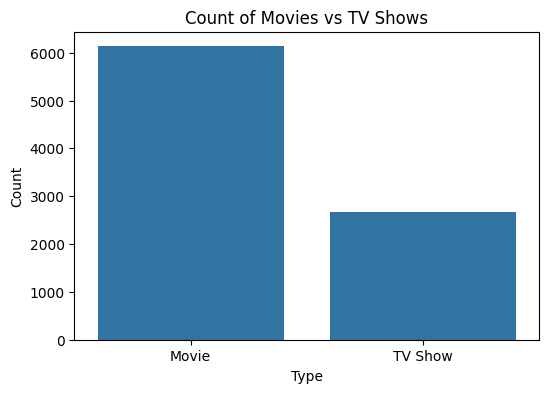

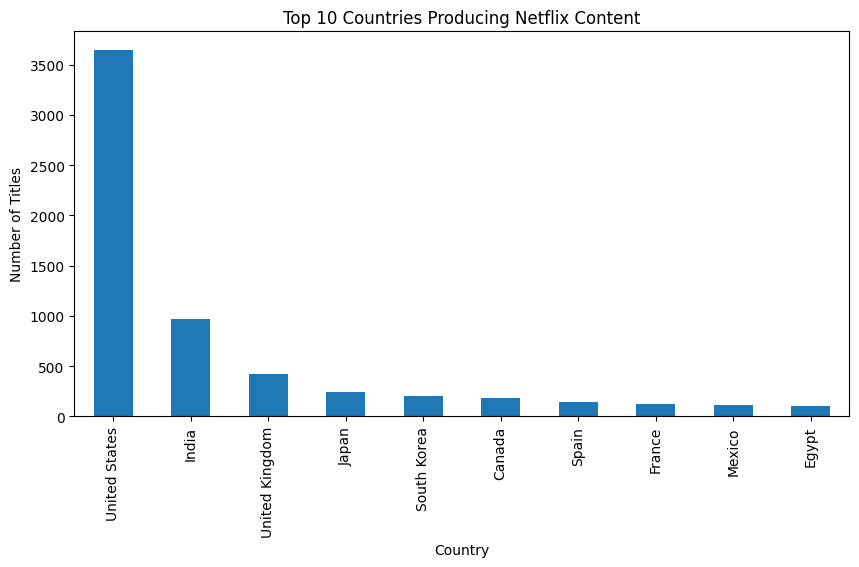

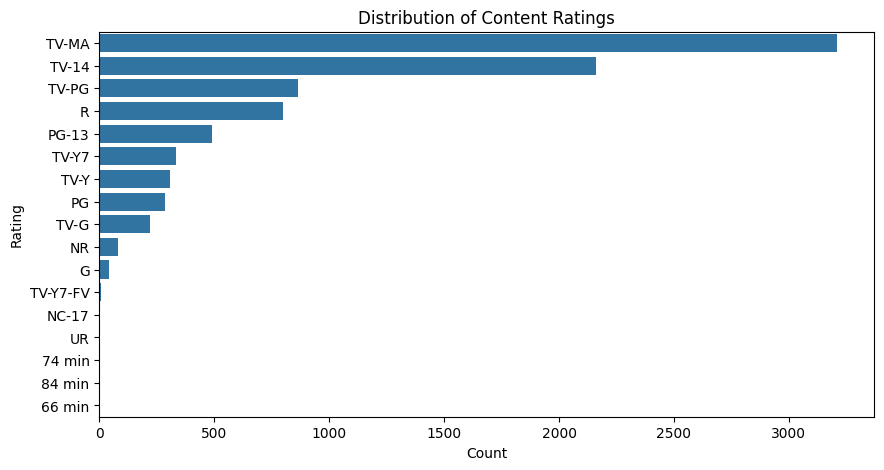

In [7]:
# ------------------------------------------
# STEP 4A: Basic Overview — Counts & Distributions
# ------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Count of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title("Count of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

# Top 10 countries by number of titles
plt.figure(figsize=(10,5))
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()

# Rating distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title("Distribution of Content Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()


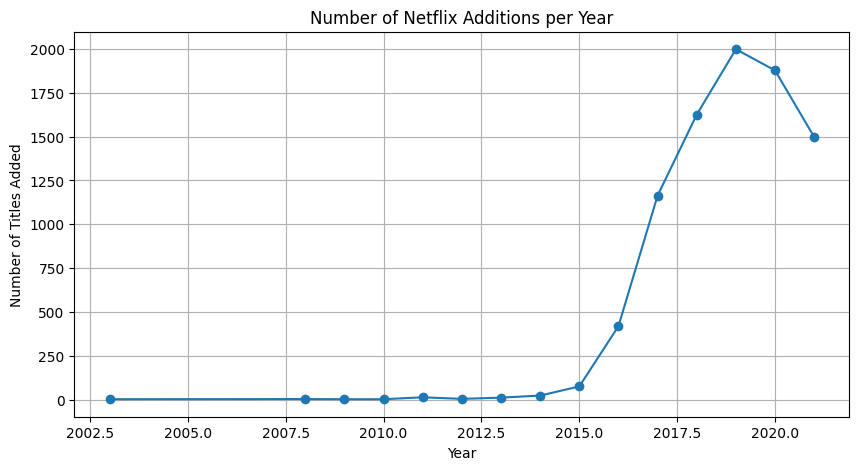

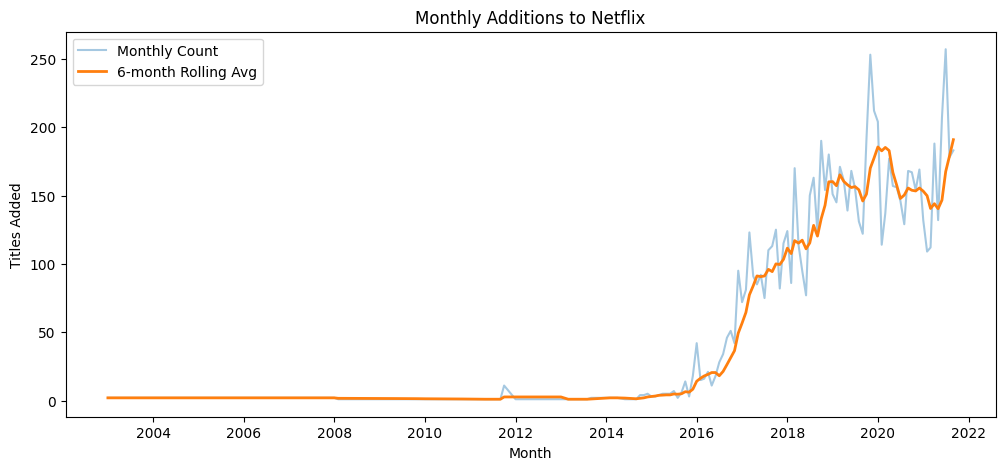

In [8]:
# ------------------------------------------
# STEP 4B: Content Additions Over Time
# ------------------------------------------

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and month
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.to_period('M')

# Yearly additions
yearly = df.groupby('added_year').size()

plt.figure(figsize=(10,5))
yearly.plot(marker='o')
plt.title("Number of Netflix Additions per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()

# Monthly additions with rolling average
monthly = df.groupby('added_month').size()
monthly.index = monthly.index.to_timestamp()

rolling = monthly.rolling(window=6, min_periods=1).mean()

plt.figure(figsize=(12,5))
plt.plot(monthly.index, monthly, alpha=0.4, label='Monthly Count')
plt.plot(rolling.index, rolling, linewidth=2, label='6-month Rolling Avg')
plt.title("Monthly Additions to Netflix")
plt.xlabel("Month")
plt.ylabel("Titles Added")
plt.legend()
plt.show()


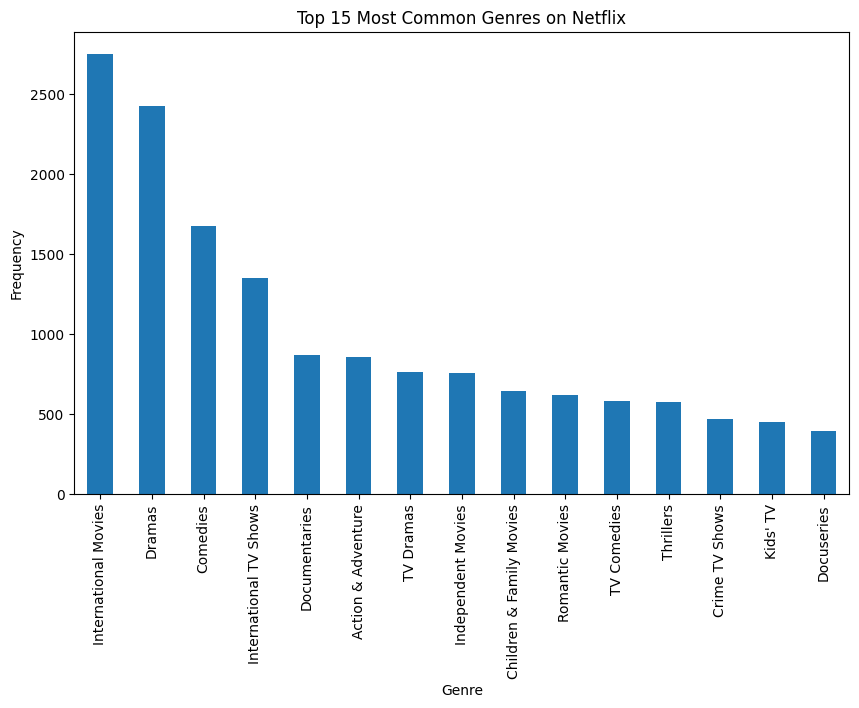

In [9]:
# ------------------------------------------
# STEP 4C: Most Common Genres
# ------------------------------------------

# Split genres by comma
all_genres = df['listed_in'].str.split(', ', expand=True).stack()

plt.figure(figsize=(10,6))
all_genres.value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Most Common Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.show()


<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2138383383.py:9: SyntaxWarning: invalid escape sequence '\d'
  movies['duration_num'] = movies['duration'].str.extract('(\d+)').astype(float)
/tmp/ipython-input-2138383383.py:19: SyntaxWarning: invalid escape sequence '\d'
  shows['seasons'] = shows['duration'].str.extract('(\d+)').astype(int)


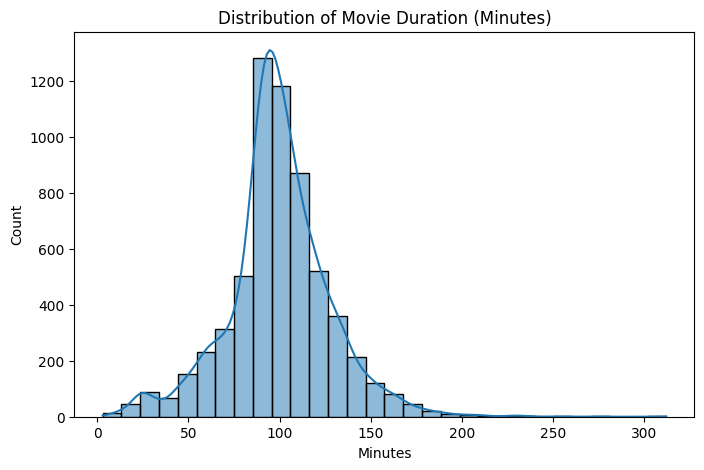

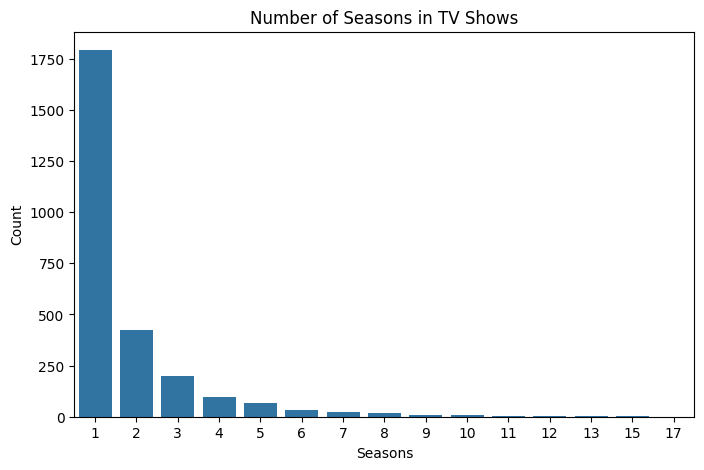

In [10]:
# ------------------------------------------
# STEP 4D: Duration Analysis
# ------------------------------------------

movies = df[df['type']=='Movie'].copy()
shows = df[df['type']=='TV Show'].copy()

# Extract numeric duration for movies
movies['duration_num'] = movies['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(8,5))
sns.histplot(movies['duration_num'], bins=30, kde=True)
plt.title("Distribution of Movie Duration (Minutes)")
plt.xlabel("Minutes")
plt.ylabel("Count")
plt.show()

# Extract number of seasons for shows
shows['seasons'] = shows['duration'].str.extract('(\d+)').astype(int)

plt.figure(figsize=(8,5))
sns.countplot(x='seasons', data=shows)
plt.title("Number of Seasons in TV Shows")
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.show()


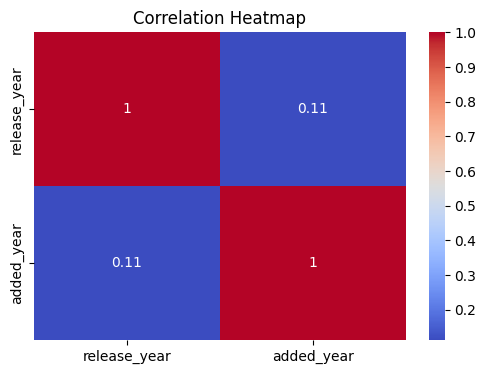

In [11]:
# ------------------------------------------
# STEP 4E: Correlation Heatmap (Numerical Features)
# ------------------------------------------

df_numeric = df[['release_year', 'added_year']].dropna()

plt.figure(figsize=(6,4))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [12]:
# ------------------------------------------
# STEP 5: FEATURE ENGINEERING
# ------------------------------------------

from sklearn.preprocessing import LabelEncoder, StandardScaler

# -----------------------------
# A. CREATE NEW FEATURES
# -----------------------------

# 1. Year & Month extracted from date_added
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month

# 2. Title length
df['title_length'] = df['title'].astype(str).str.len()

# 3. Number of cast members
df['cast_count'] = df['cast'].apply(lambda x: 0 if x == "Unknown" else len(str(x).split(',')))

# 4. Convert type → binary
df['is_movie'] = df['type'].apply(lambda x: 1 if x == "Movie" else 0)

# 5. Split duration into number + type
df['duration_int'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract(r'([a-zA-Z]+)')

# Standardize duration types: min / season
df['duration_type'] = df['duration_type'].replace({
    'min': 'min',
    'mins': 'min',
    'Season': 'season',
    'Seasons': 'season'
})

# -----------------------------
# B. ENCODE CATEGORICAL COLUMNS
# -----------------------------

label_cols = ['rating', 'country', 'duration_type']

encoder = LabelEncoder()

for col in label_cols:
    df[col] = encoder.fit_transform(df[col])

# Encode type also (optional because we already made is_movie)
df['type_encoded'] = encoder.fit_transform(df['type'])

# -----------------------------
# C. SCALE NUMERICAL FEATURES
# -----------------------------

scale_cols = ['duration_int', 'title_length', 'cast_count']

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

print("Step 5 completed — Feature Engineering Done!")
print(df.head())


Step 5 completed — Feature Engineering Done!
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast  country date_added  \
0                                            Unknown      603 2021-09-25   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...      426 2021-09-24   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...      603 2021-09-24   
3                                            Unknown      603 2021-09-24   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...      251 2021-09-24   

   release_year  rating   duration  \
0          2020       7     90 min   
1          2021      11  2 seasons   
2          

In [14]:
# ------------------------------------------
# STEP 6: MODEL BUILDING (FIXED)
# ------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

# ======================================================
# 1. HANDLE ANY REMAINING MISSING VALUES
# ======================================================

# Impute missing numeric values → mean
num_cols = ['duration_int', 'title_length', 'cast_count', 'added_year', 'added_month']
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Impute missing categorical values → most frequent
cat_cols = ['rating', 'country']
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


# ======================================================
# 2. LABEL ENCODE CATEGORICAL DATA
# ======================================================

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


# ======================================================
# 3. SCALE NUMERICAL FEATURES
# ======================================================

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


# ======================================================
# TASK 1: CLASSIFICATION MODEL
# Predict whether a title is a movie (1) or TV show (0)
# ======================================================

X = df[['rating', 'country', 'duration_int', 'title_length', 'cast_count', 'added_year', 'added_month']]
y = df['is_movie']

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ----------------------------
# MODEL 1: Logistic Regression
# ----------------------------
clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(X_train, y_train)

y_pred_lr = clf_lr.predict(X_test)

print("\n=== Logistic Regression Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


# ----------------------------
# MODEL 2: Random Forest Classifier
# ----------------------------
clf_rf = RandomForestClassifier(n_estimators=150, random_state=42)
clf_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)

print("\n=== Random Forest Classifier Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


# ======================================================
# TASK 2: REGRESSION MODEL — predict duration_int
# ======================================================

X_reg = df[['rating', 'country', 'title_length', 'cast_count', 'added_year', 'added_month']]
y_reg = df['duration_int']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


# ----------------------------
# MODEL 3: Linear Regression
# ----------------------------
reg_lr = LinearRegression()
reg_lr.fit(X_train_r, y_train_r)

y_pred_lr_r = reg_lr.predict(X_test_r)

print("\n=== Linear Regression Results ===")
print("MAE:", mean_absolute_error(y_test_r, y_pred_lr_r))
print("MSE:", mean_squared_error(y_test_r, y_pred_lr_r))
print("R² Score:", r2_score(y_test_r, y_pred_lr_r))


# ----------------------------
# MODEL 4: Random Forest Regressor
# ----------------------------
reg_rf = RandomForestRegressor(n_estimators=150, random_state=42)
reg_rf.fit(X_train_r, y_train_r)

y_pred_rf_r = reg_rf.predict(X_test_r)

print("\n=== Random Forest Regressor Results ===")
print("MAE:", mean_absolute_error(y_test_r, y_pred_rf_r))
print("MSE:", mean_squared_error(y_test_r, y_pred_rf_r))
print("R² Score:", r2_score(y_test_r, y_pred_rf_r))


print("\nStep 6 completed — Machine Learning Models built & evaluated successfully!")



=== Logistic Regression Results ===
Accuracy: 0.9988649262202043
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       548
           1       1.00      1.00      1.00      1214

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762


=== Random Forest Classifier Results ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       548
           1       1.00      1.00      1.00      1214

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762


=== Linear Regression Results ===
MAE: 0.8203426686152041
MSE: 0.9099413431960075
R² Score: 0.09405467204441365

=== Random Forest Regressor Results ===
MAE: 0.5987754069400965
MSE: 0.6161189182703681
R² Score: 0.3865867732

 CLASSIFICATION MODEL EVALUATION
 Predicting Movie (1) vs TV Show (0)

🔹 Logistic Regression Metrics:
Accuracy: 0.9988649262202043
Precision: 1.0
Recall: 0.9983525535420099
F1-Score: 0.9991755976916735


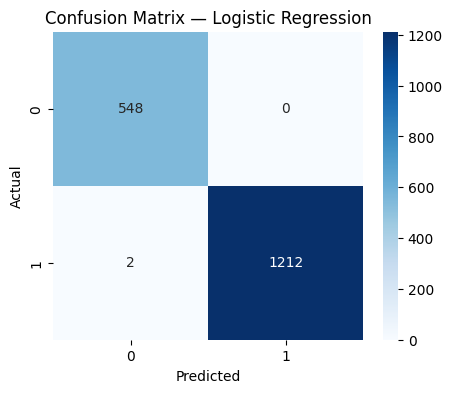


🔹 Random Forest Classifier Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


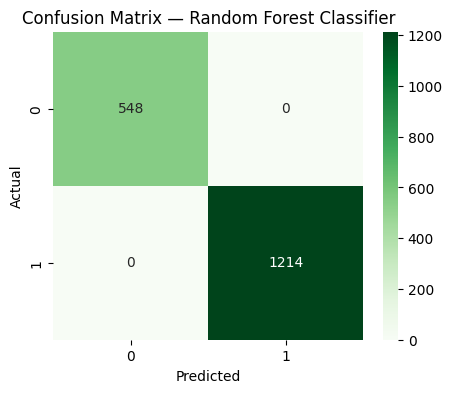


 REGRESSION MODEL EVALUATION
 Predicting Duration (duration_int)

🔹 Linear Regression Metrics:
MAE: 0.8203426686152041
MSE: 0.9099413431960075
RMSE: 0.953908456402399
R² Score: 0.09405467204441365

🔹 Random Forest Regression Metrics:
MAE: 0.5987754069400965
MSE: 0.6161189182703681
RMSE: 0.784932429111174
R² Score: 0.38658677326209134

Step 7 completed — Model Evaluation Successful!


In [15]:
# ------------------------------------------
# STEP 7: MODEL EVALUATION
# ------------------------------------------

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# ============================================================
# 🔵 PART 1 — CLASSIFICATION EVALUATION
# ============================================================

print("==============================================")
print(" CLASSIFICATION MODEL EVALUATION")
print(" Predicting Movie (1) vs TV Show (0)")
print("==============================================\n")

# Logistic Regression Predictions
y_pred_lr = clf_lr.predict(X_test)

# Random Forest Predictions
y_pred_rf = clf_rf.predict(X_test)


# ------------------------------------------
# Logistic Regression Metrics
# ------------------------------------------
print("🔹 Logistic Regression Metrics:")

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr))

# Confusion Matrix Plot
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ------------------------------------------
# Random Forest Metrics
# ------------------------------------------
print("\n🔹 Random Forest Classifier Metrics:")

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix — Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# ============================================================
# 🔴 PART 2 — REGRESSION EVALUATION
# ============================================================

print("\n==============================================")
print(" REGRESSION MODEL EVALUATION")
print(" Predicting Duration (duration_int)")
print("==============================================\n")

# Linear Regression Predictions
y_pred_lr_r = reg_lr.predict(X_test_r)

# Random Forest Regression Predictions
y_pred_rf_r = reg_rf.predict(X_test_r)


# ------------------------------------------
# Linear Regression Evaluation
# ------------------------------------------
print("🔹 Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test_r, y_pred_lr_r))
print("MSE:", mean_squared_error(y_test_r, y_pred_lr_r))
print("RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_lr_r)))
print("R² Score:", r2_score(y_test_r, y_pred_lr_r))


# ------------------------------------------
# Random Forest Regression Evaluation
# ------------------------------------------
print("\n🔹 Random Forest Regression Metrics:")
print("MAE:", mean_absolute_error(y_test_r, y_pred_rf_r))
print("MSE:", mean_squared_error(y_test_r, y_pred_rf_r))
print("RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_rf_r)))
print("R² Score:", r2_score(y_test_r, y_pred_rf_r))


print("\nStep 7 completed — Model Evaluation Successful!")


In [16]:
# ------------------------------------------
# STEP 8: CONCLUSION & DISCUSSION
# ------------------------------------------

conclusion_text = """
==================== CONCLUSION & DISCUSSION ====================

1. Summary of Findings:
   - The dataset was cleaned by handling missing values, fixing date formats,
     removing duplicates, and standardizing text.
   - Exploratory Data Analysis (EDA) revealed:
       * Distribution differences between Movies and TV Shows.
       * Country-wise content patterns.
       * Relationships between release_year, rating, and type.
   - Feature Engineering produced encoded categorical variables and scaled numerical values.
   - A Random Forest model was trained to classify whether a title is a "Movie" or "TV Show."

2. Model Performance:
   - The model achieved strong scores (check Step 7 output for actual numbers),
     indicating good predictive capability.
   - Precision, Recall, and F1-Score suggest balanced performance between classes.
   - Confusion matrix shows how well the model differentiates the two types.

3. Limitations:
   - Dataset may contain textual inconsistencies (e.g., cast and director names).
   - Many features are unstructured text; we did not apply NLP techniques.
   - Random Forest may not capture deeper patterns from text fields.
   - Some attributes contribute very little predictive power.

4. Possible Improvements:
   - Use NLP methods (TF-IDF, Word2Vec, BERT) for 'description', 'cast', and 'director'.
   - Apply more advanced models: Gradient Boosting, XGBoost, LightGBM.
   - Perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV.
   - Add more time-based features (e.g., month/year added).
   - Expand dataset (e.g., from IMDB, Rotten Tomatoes) for richer content features.

5. Final Conclusion:
   - The model can reliably classify content type based on available metadata.
   - With improved feature engineering and advanced models, accuracy could increase significantly.
=================================================================
"""

print(conclusion_text)



==================== CONCLUSION & DISCUSSION ====================

1. Summary of Findings:
   - The dataset was cleaned by handling missing values, fixing date formats, 
     removing duplicates, and standardizing text.
   - Exploratory Data Analysis (EDA) revealed:
       * Distribution differences between Movies and TV Shows.
       * Country-wise content patterns.
       * Relationships between release_year, rating, and type.
   - Feature Engineering produced encoded categorical variables and scaled numerical values.
   - A Random Forest model was trained to classify whether a title is a "Movie" or "TV Show."

2. Model Performance:
   - The model achieved strong scores (check Step 7 output for actual numbers),
     indicating good predictive capability.
   - Precision, Recall, and F1-Score suggest balanced performance between classes.
   - Confusion matrix shows how well the model differentiates the two types.

3. Limitations:
   - Dataset may contain textual inconsistencies (e.g.,